<a href="https://colab.research.google.com/github/francescakaganzi/MachineLearning/blob/main/Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Lab Assignment: Predictive Modeling for Insurance Claims**

Name: Francesca Kaganzi

Student no: 2300704669

Reg No: 2023/HD05/04669U



Objective:
Build a predictive model to determine if a building will have an insurance claim during a specific
period using building characteristics.


Step 1: Exploratory Data Analysis

In [149]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_selection import f_classif, SelectKBest
import os
%matplotlib inline
sns.set(color_codes=True)

In [150]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [172]:
# Data Preprocessing
# Load data
train_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/train_data.csv')
test_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/test_data.csv')

In [173]:
# Display information about the total number of Features and Observations
train_data.shape

(7160, 14)

In [174]:
# Display the top 5 rows of the Dataframe
train_data.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [175]:
# Statistical summary of the dataset
display(train_data.describe())

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [176]:
#Get the object types of the Feature Columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


Step 2: Data Preperation

*   Handle missing values appropriately (imputation or removal)
*   Encode categorical variables if necessary
*   Scale numerical variables if necessary

In [177]:
# Check for missing values
train_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [178]:
test_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [179]:
# Split the variables into Categorical and Numerical
categorical_columns = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']
numerical_columns = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy']

In [180]:
#Dealing with continous variables
train_data.describe().round(2)

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.00,7160.00,7160.00,7054.00,7160.00,6652.00,7160.00
mean,2013.67,0.91,0.31,1883.73,2.19,1964.46,0.23
std,1.38,0.24,0.46,2278.16,0.94,36.00,0.42
min,2012.00,0.00,0.00,1.00,1.00,1545.00,0.00
25%,2012.00,1.00,0.00,528.00,2.00,1960.00,0.00
50%,2013.00,1.00,0.00,1083.00,2.00,1970.00,0.00
75%,2015.00,1.00,1.00,2289.75,3.00,1980.00,0.00
max,2016.00,1.00,1.00,20940.00,4.00,2016.00,1.00


In [191]:
test_data.describe().round(2)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
count,3069.00,3069.00,3069.00,3069.00,3069.00,3069.00,3069.00,3069.00,3069.00,3069.00
mean,2013.59,0.92,0.22,0.55,0.73,0.73,0.73,1663.54,2.36,1967.07
std,1.37,0.22,0.42,0.50,0.44,0.44,0.44,2246.96,1.00,22.05
min,2012.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1750.00
25%,2012.00,1.00,0.00,0.00,0.00,0.00,0.00,477.00,2.00,1960.00
50%,2013.00,1.00,0.00,1.00,1.00,1.00,1.00,900.00,2.00,1968.00
75%,2015.00,1.00,0.00,1.00,1.00,1.00,1.00,1947.00,3.00,1980.00
max,2016.00,1.00,1.00,1.00,1.00,1.00,1.00,30745.00,4.00,2012.00


<Axes: >

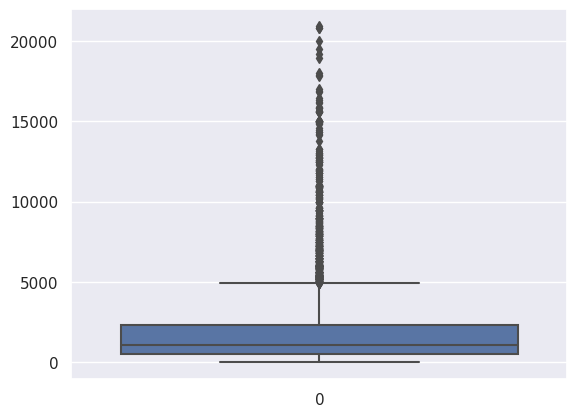

In [182]:
#Checking distribution to help decide the imputation method to use for the continous variables
sns.boxplot(train_data['Building Dimension'])

<Axes: >

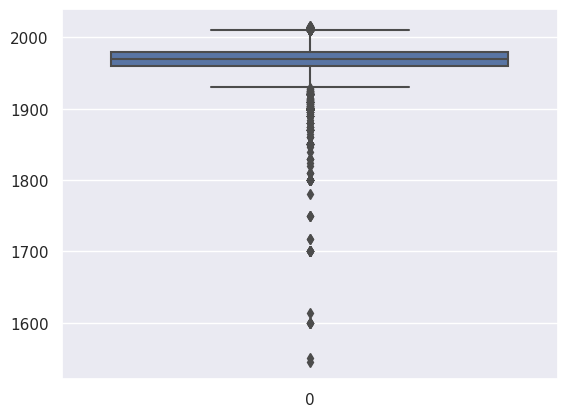

In [183]:
sns.boxplot(train_data['Date_of_Occupancy'])

In [184]:
#Replace missing values for the building dimension and date of occupancy with Median since both are highly skewed
train_data['Date_of_Occupancy'] = train_data['Date_of_Occupancy'].fillna(train_data['Date_of_Occupancy'].median())
train_data['Building Dimension'] = train_data['Building Dimension'].fillna(train_data['Building Dimension'].median())
test_data['Date_of_Occupancy'] = test_data['Date_of_Occupancy'].fillna(test_data['Date_of_Occupancy'].median())
test_data['Building Dimension'] = test_data['Building Dimension'].fillna(test_data['Building Dimension'].median())

In [185]:
#Replace the categorical variables with the mode
train_data['Garden'] = train_data['Garden'].fillna(train_data['Garden'].mode()[0])
train_data['Geo_Code'] = train_data['Geo_Code'].fillna(train_data['Geo_Code'].mode()[0])
test_data['Garden'] = test_data['Garden'].fillna(test_data['Garden'].mode()[0])
test_data['Geo_Code'] = test_data['Geo_Code'].fillna(test_data['Geo_Code'].mode()[0])

In [186]:
train_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [187]:
test_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [203]:
# Encode the categorical variables
categorical_columns_encode = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.fit_transform(test_data[column])

In [204]:
# Display the top 5 rows of the test and train data frames after imputation and encoding
train_data.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0,7,0
1,H2037,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,7,0
2,H3802,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0,7,0
3,H3834,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0,7,0
4,H5053,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,7,0


In [205]:
test_data.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,1,0,0,0,300.0,1,1960.0,3,142
1,H11921,2016,0.997268,0,1,0,0,0,300.0,1,1960.0,3,142
2,H9805,2013,0.369863,0,1,1,1,1,790.0,1,1960.0,0,142
3,H7493,2014,1.000000,0,1,0,0,0,1405.0,1,2004.0,3,143
4,H7494,2016,1.000000,0,1,0,0,0,1405.0,1,2004.0,3,143


Step 3: Feature Analysis

Plotting Feature Distributions


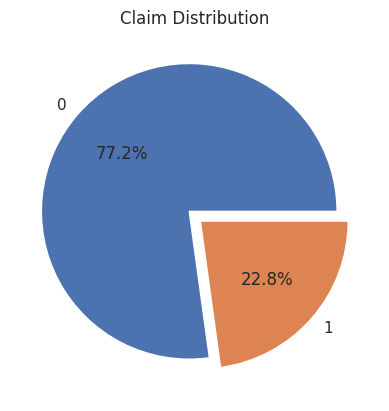

In [206]:
# Define the explode values to create a "pie slice" effect
dfexplode = (0.05, 0.05)
# Create a pie chart to visualize the distribution of 'Claim' values
plt.pie(train_data['Claim'].value_counts(), labels=['0', '1'], autopct='%1.1f%%', explode=dfexplode)
# Add a title to the pie chart
plt.title("Claim Distribution")
# Display the pie chart
plt.show()

The distribution of the claims shows that most of the insurance claims are rejected.

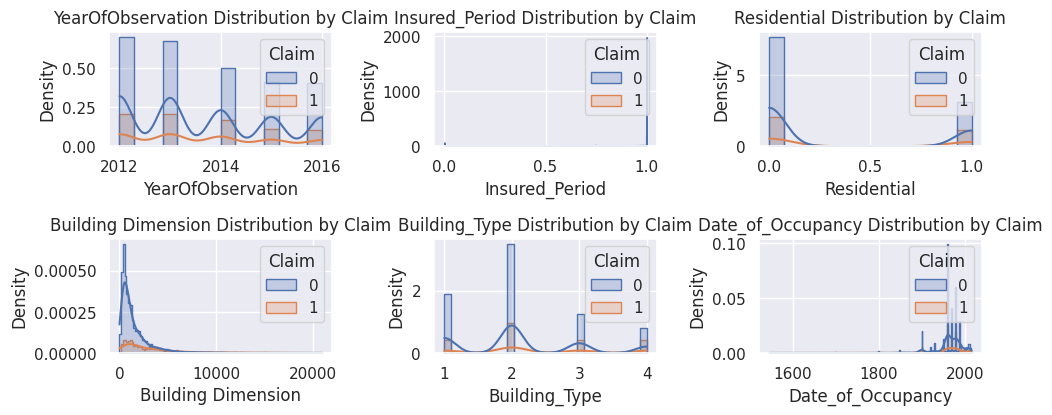

In [196]:
# Cross Analysis between Claim and Numerical Features
# Create a new figure with a specific size (10x10 inches)
plt.figure(figsize=(10, 10))

# Loop through the numerical columns for visualization
for i, column in enumerate(numerical_columns, 1):
    # Create subplots in a 5x3 grid (5 rows, 3 columns)
    plt.subplot(5, 3, i)
    # Create histograms to visualize the distribution of the numerical feature for different values of 'Claim'
    sns.histplot(data=train_data, x=column, hue='Claim', kde=True, element='step', stat='density')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column} Distribution by Claim')

# Adjust the layout for better spacing between subplots
plt.tight_layout()
# Display the figure containing the histograms
plt.show()


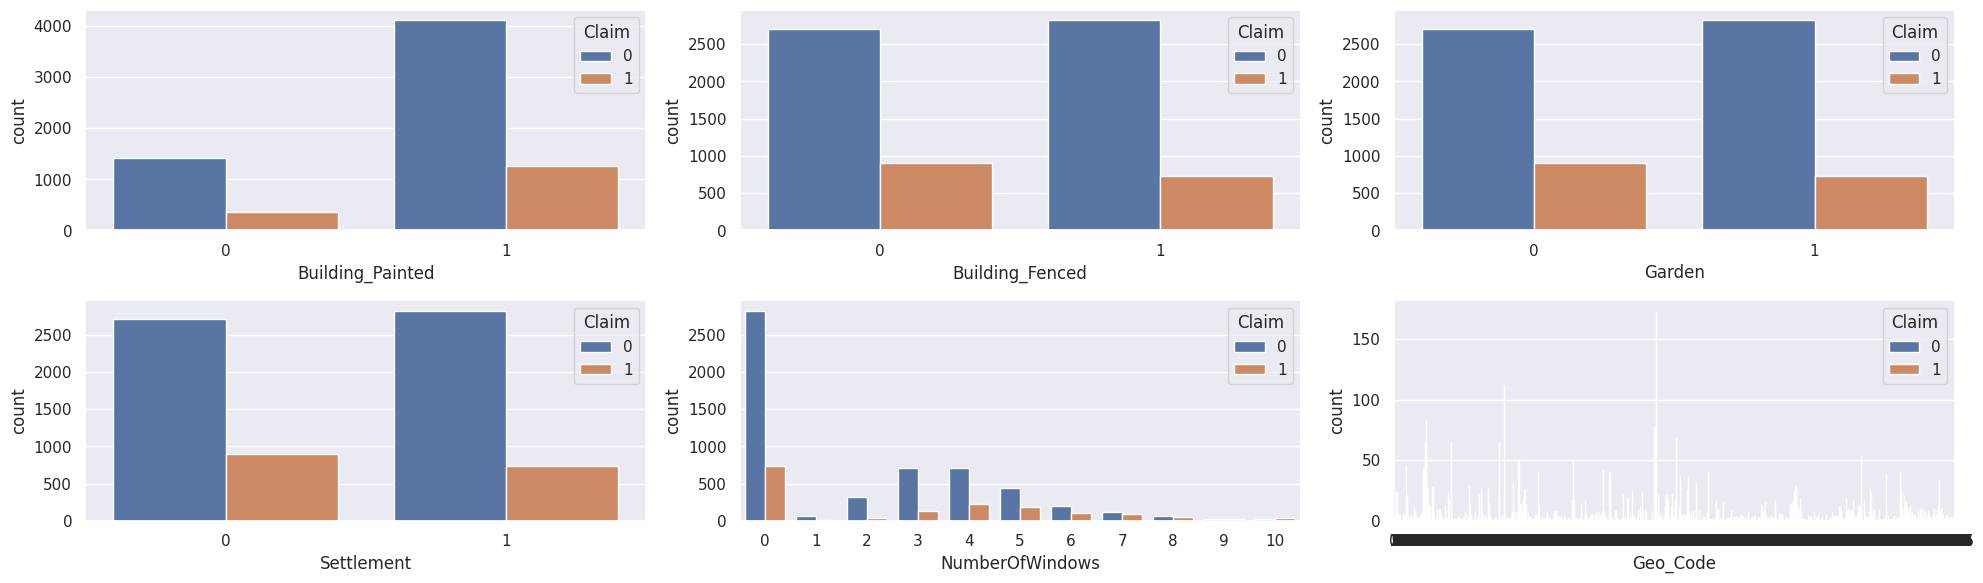

In [207]:
#Cross Analysis between Claim and Categorical Features
# Create a new figure with a specific size (20x20 inches)
plt.figure(figsize=(20, 20))
# Initialize locators for subplot positioning
locator1, locator2 = [0, 0]
# Loop through each categorical column for visualization
for column in categorical_columns:
    # Check if the current column is 'JobRole'
    if column == 'Claim':
        # Create a subplot that spans 3 columns (colspan=3) and 1 row (rowspan=1)
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        # Create a countplot for 'JobRole' with hue='Attrition'
        sns.countplot(x=column, hue='Claim', data=train_data)
        # Update the locator positions
        locator1 += 1
        locator2 = 0
        continue
    # Create a subplot within the 7x3 grid
    plt.subplot2grid((7, 3), (locator1, locator2))
    # Create a countplot for the current categorical column with hue='Attrition'
    sns.countplot(x=column, hue='Claim', data=train_data)
    # Update the locator position in the grid
    locator2 += 1
    # Check if a new row should start
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    # Check if all subplots have been created
    if locator1 == 7:
        break
# Adjust the layout for better spacing between subplots
plt.tight_layout()
# Display the figure containing the countplots
plt.show()

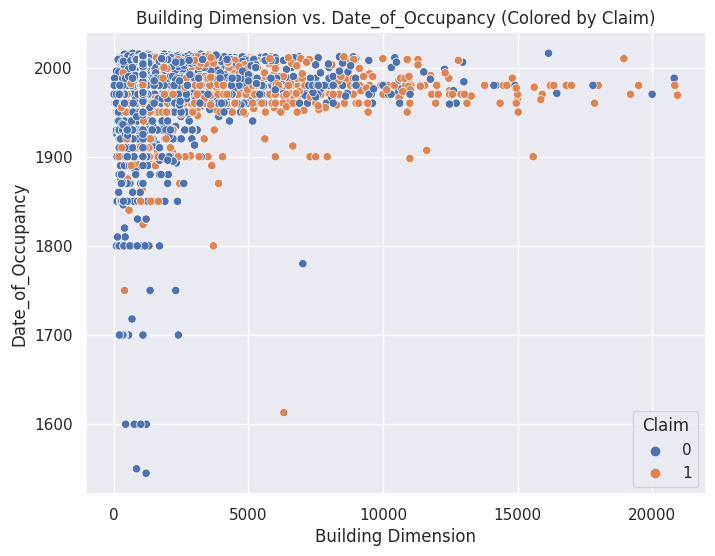

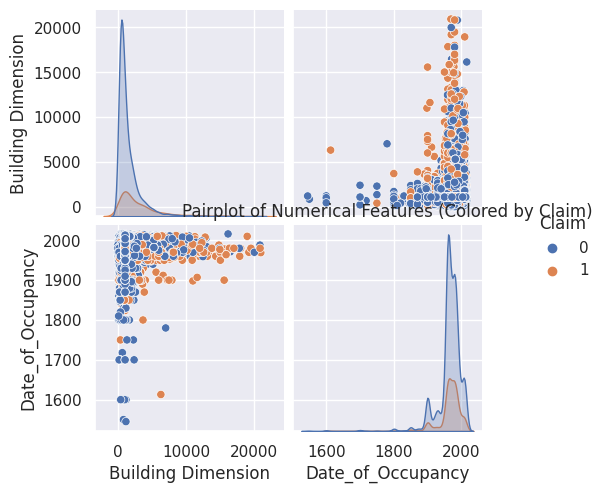

   Claim  Building Dimension
0      0         1508.147666
1      1         3101.951040


In [198]:
# Scatterplot for 'Building Dimension' vs. 'Date_of_Occupancy'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='Building Dimension', y='Date_of_Occupancy', hue='Claim')
plt.title('Building Dimension vs. Date_of_Occupancy (Colored by Claim)')
plt.xlabel('Building Dimension')
plt.ylabel('Date_of_Occupancy')
plt.legend(title='Claim')
plt.show()

# Pairplot
sns.pairplot(train_data[['Building Dimension', 'Date_of_Occupancy', 'Claim']], hue='Claim')
plt.title('Pairplot of Numerical Features (Colored by Claim)')
plt.show()

# Groupby Comparisons (Example: Mean 'Building Dimension' by 'Claim')
grouped_claim = train_data.groupby('Claim')['Building Dimension'].mean().reset_index()
print(grouped_claim)

Insights



*   Possibility of class imbalance
*   Skewed data for building dimension and date of occupancy

<ipython-input-208-17255d9b94a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


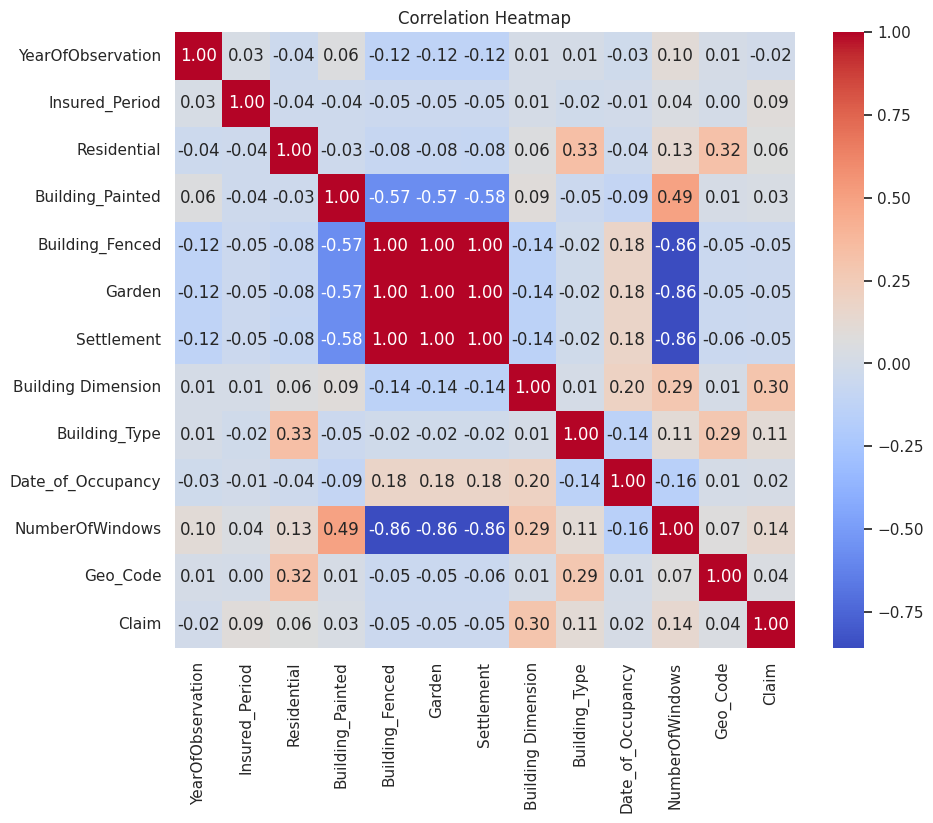

In [208]:
# Correlation Heatmap
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Step 4: Feature Selection

In [209]:
# Split data into features (X) and target variable (y)
X = train_data.drop(columns = ['Customer Id','NumberOfWindows','Claim'], axis=1)
y = train_data['Claim']

In [210]:
X.head(5)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code
0,2013,1.0,0,0,1,1,1,290.0,1,1960.0,7
1,2015,1.0,0,1,0,0,0,490.0,1,1850.0,7
2,2014,1.0,0,0,1,1,1,595.0,1,1960.0,7
3,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,7
4,2014,1.0,0,1,0,0,0,680.0,1,1800.0,7


In [211]:
#Using K variance to select the best features for the model
# Create a SelectKBest feature selection object
fs = SelectKBest(score_func=f_classif, k=10)
# Fit the feature selection object to the training data and select the top 15 features
X_fs = fs.fit_transform(X, y)
# Print the names of the selected features
print(f"Selected features: {fs.get_feature_names_out()}\n")
# Print the shape of the transformed feature matrix
print(f"Shape of X_fs: {X_fs.shape}")

Selected features: ['Insured_Period' 'Residential' 'Building_Painted' 'Building_Fenced'
 'Garden' 'Settlement' 'Building Dimension' 'Building_Type'
 'Date_of_Occupancy' 'Geo_Code']

Shape of X_fs: (7160, 10)


Step 5: Model Building

In [212]:
# Model Evaluation
# Split the training data into a training set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (5728, 10) (5728,)
Test (1432, 10) (1432,)


In [213]:
# Model Selection
# Initialize models
svm_model = SVC()
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

In [218]:
# Spot Check Algorithms to Evaluate Models
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('Support Vector Machines', SVC(probability=True)))

Step 6: Training the models and tuning the hyperparameters

In [219]:
# Evaluate each model in turn using Stratified Kfold for Cross Validation
# Create empty lists to store model results and model names
results = []
names = []
# Loop through a list of (model_name, model_instance) tuples
for name, model in models:
    # Initialize a StratifiedKFold cross-validation iterator
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # Perform cross-validation using the current model and training data
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # Append the cross-validation results to the 'results' list
    results.append(cv_results)
    # Append the model name to the 'names' list
    names.append(name)
    # Print the mean and standard deviation of the cross-validation results for the current model
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LogisticRegression: 0.785263 (0.007877)
KNeighborsClassifier: 0.747027 (0.010774)
GaussianNB: 0.782995 (0.008775)
Support Vector Machines: 0.782993 (0.008993)


Step 7: Evaluating the models using AUC score

LogisticRegression: AUC = 0.704250
KNeighborsClassifier: AUC = 0.632616
GaussianNB: AUC = 0.656235
Support Vector Machines: AUC = 0.604883


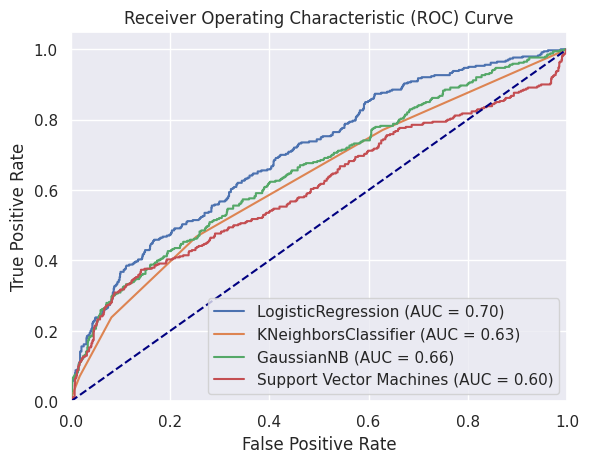

In [220]:
# Create empty lists to store AUC scores
auc_scores = []

# Loop through a list of (model_name, model_instance) tuples
for name, model in models:
    # Fit the model on the entire training data
    model.fit(X_train, y_train)
    # Predict probabilities on the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    # Print the AUC score for the current model
    print('%s: AUC = %f' % (name, roc_auc))
    # Plot ROC curve for the current model
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Customize the ROC curve plot
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Step 8: Making predictions using the evaluated models

In [221]:
# Assuming selected_features is the list of features obtained from feature selection
selected_features = ['Insured_Period','Residential','Building_Painted','Building_Fenced','Garden','Settlement','Building Dimension','Building_Type','Date_of_Occupancy','Geo_Code']

pred_X = test_data[selected_features]

# Define the submission directory
submission_dir = 'gdrive/My Drive/Colab Notebooks/'

# Loop through a list of (model_name, model_instance) tuples
for name, model in models:
    # Fit the model on the entire training dataset
    model.fit(X_train, y_train)

    # Try to set feature names if supported by the model
    try:
        model.feature_names_in_ = selected_features
    except AttributeError:
        pass

    # Predict probabilities on the test dataset using the selected features
    test_pred_proba = model.predict_proba(pred_X)[:, 1]

    # Create a DataFrame for submission
    submission_df = pd.DataFrame({'Customer Id': test_data['Customer Id'], 'Claim': test_pred_proba})

    # Save the submission DataFrame to a CSV file
    submission_path = os.path.join(submission_dir, f'submissions_{name}.csv')
    submission_df.to_csv(submission_path, index=False)

    print(f'Submission file for {name} saved at: {submission_path}')

# No feature name warnings

Submission file for LogisticRegression saved at: gdrive/My Drive/Colab Notebooks/submissions_LogisticRegression.csv
Submission file for KNeighborsClassifier saved at: gdrive/My Drive/Colab Notebooks/submissions_KNeighborsClassifier.csv
Submission file for GaussianNB saved at: gdrive/My Drive/Colab Notebooks/submissions_GaussianNB.csv
Submission file for Support Vector Machines saved at: gdrive/My Drive/Colab Notebooks/submissions_Support Vector Machines.csv
